In [1]:
import os
import os.path
import numpy as np
import glob
import matplotlib.pyplot as plt
import preprocessing_functions as pre
import training_functions as training
import skimage.io
import prediction as pred
import keras

Using TensorFlow backend.


In [2]:
images = glob.glob(r"C:\Users\tsche\Desktop\Master\2. Semester\Project Staining\Val_Images\*d0.png") # define imagefolder
X_val = pre.stack_images(images, num_channels = 1)
images2 = glob.glob(r"C:\Users\tsche\Desktop\Master\2. Semester\Project Staining\Val_Images\*.png")
images =  [x for x in images2 if x not in images]
Y_val = pre.stack_images(images, num_channels = 2)

In [3]:
# Imageset1
images = glob.glob(r"C:\Users\tsche\Desktop\Master\2. Semester\Project Staining\Imageset1\*d0.png") # define imagefolder
X_1 = pre.stack_images(images, num_channels = 1)
images2 = glob.glob(r"C:\Users\tsche\Desktop\Master\2. Semester\Project Staining\Imageset1\*.png")
images =  [x for x in images2 if x not in images]
Y_1 = pre.stack_images(images, num_channels = 2)

In [4]:
# Imageset2
images = glob.glob(r"C:\Users\tsche\Desktop\Master\2. Semester\Project Staining\Imageset2\*d0.png") # define imagefolder
X_2 = pre.stack_images(images, num_channels = 1)
images2 = glob.glob(r"C:\Users\tsche\Desktop\Master\2. Semester\Project Staining\Imageset2\*.png")
images =  [x for x in images2 if x not in images]
Y_2 = pre.stack_images(images, num_channels = 2)

In [5]:
# Imageset3
images = glob.glob(r"C:\Users\tsche\Desktop\Master\2. Semester\Project Staining\Imageset3\*d0.png") # define imagefolder
X_3 = pre.stack_images(images, num_channels = 1)
images2 = glob.glob(r"C:\Users\tsche\Desktop\Master\2. Semester\Project Staining\Imageset3\*.png")
images =  [x for x in images2 if x not in images]
Y_3 = pre.stack_images(images, num_channels = 2)

In [6]:
# Imageset4
images = glob.glob(r"C:\Users\tsche\Desktop\Master\2. Semester\Project Staining\Imageset4\*d0.png") # define imagefolder
X_4 = pre.stack_images(images, num_channels = 1)
images2 = glob.glob(r"C:\Users\tsche\Desktop\Master\2. Semester\Project Staining\Imageset4\*.png")
images =  [x for x in images2 if x not in images]
Y_4 = pre.stack_images(images, num_channels = 2)

In [7]:
# normalize images
(x_4, mean, std) = pre.norm_batch(X_4)
x_1 = pre.norm(X_1, mean, std)
x_2 = pre.norm(X_2, mean, std)
x_3 = pre.norm(X_3, mean, std)
x_val = pre.norm(X_val, mean, std)
y_1 = pre.norm(Y_1, mean, std)
y_2 = pre.norm(Y_2, mean, std)
y_3 = pre.norm(Y_3, mean, std)
y_4 = pre.norm(Y_4, mean, std)
y_val = pre.norm(Y_val, mean, std)

In [8]:
#define modelname
names = ['d1d2_8im','d1d2_16im','d1d2_32im','d1d2_56im']


Input (None, 128, 128, 1)
1. Conv (None, 64, 64, 64)
2. conv (None, 64, 64, 128)
3. conv (None, 32, 32, 256)
4. conv (None, 16, 16, 512)
1. UpConv (None, 32, 32, 768)
2. UpConv (None, 64, 64, 384)
3. UpConv (None, 128, 128, 192)
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 64) 256         conv2d[0][0]                     
______________________________________________________________

Epoch 1/50
10/10 [==============================] - 145s 15s/step - loss: 1.0027 - mse: 1.0027 - mae: 0.6931 - val_loss: 1.0401 - val_mse: 1.0401 - val_mae: 0.5823

Epoch 00001: val_loss improved from inf to 1.04011, saving model to d1d2_8im
INFO:tensorflow:Assets written to: d1d2_8im\assets
Epoch 2/50
10/10 [==============================] - 136s 14s/step - loss: 0.5077 - mse: 0.5077 - mae: 0.4903 - val_loss: 0.7502 - val_mse: 0.7502 - val_mae: 0.5769

Epoch 00002: val_loss improved from 1.04011 to 0.75017, saving model to d1d2_8im
INFO:tensorflow:Assets written to: d1d2_8im\assets
Epoch 3/50
10/10 [==============================] - 143s 15s/step - loss: 0.4421 - mse: 0.4421 - mae: 0.4621 - val_loss: 0.6364 - val_mse: 0.6364 - val_mae: 0.5158

Epoch 00003: val_loss improved from 0.75017 to 0.63640, saving model to d1d2_8im
INFO:tensorflow:Assets written to: d1d2_8im\assets
Epoch 4/50
10/10 [==============================] - 144s 15s/step - loss: 0.3910 - mse: 0.3910 - mae: 0.4318 - va

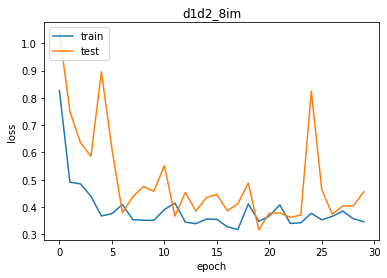

Lossy conversion from float64 to uint8. Range [3426.4427729012655, 24866.7085338479]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [3426.4427729012655, 12516.561144361072]. Convert image to uint8 prior to saving to suppress this warning.


(144, 128, 128, 2)
Input (None, 128, 128, 1)
1. Conv (None, 64, 64, 64)
2. conv (None, 64, 64, 128)
3. conv (None, 32, 32, 256)
4. conv (None, 16, 16, 512)
1. UpConv (None, 32, 32, 768)
2. UpConv (None, 64, 64, 384)
3. UpConv (None, 128, 128, 192)
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 128, 128, 64) 640         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_14 (BatchNo (None, 128, 128, 64) 256         conv2d_15[0][0]                  
__________________________________________

10/10 [==============================] - 139s 14s/step - loss: 1.1902 - mse: 1.1902 - mae: 0.7545 - val_loss: 1.2915 - val_mse: 1.2915 - val_mae: 0.7439

Epoch 00001: val_loss improved from inf to 1.29147, saving model to d1d2_16im
INFO:tensorflow:Assets written to: d1d2_16im\assets
Epoch 2/50
10/10 [==============================] - 137s 14s/step - loss: 0.6282 - mse: 0.6282 - mae: 0.5563 - val_loss: 0.8037 - val_mse: 0.8037 - val_mae: 0.6486

Epoch 00002: val_loss improved from 1.29147 to 0.80368, saving model to d1d2_16im
INFO:tensorflow:Assets written to: d1d2_16im\assets
Epoch 3/50
10/10 [==============================] - 138s 14s/step - loss: 0.4937 - mse: 0.4937 - mae: 0.4824 - val_loss: 0.5843 - val_mse: 0.5843 - val_mae: 0.5979

Epoch 00003: val_loss improved from 0.80368 to 0.58430, saving model to d1d2_16im
INFO:tensorflow:Assets written to: d1d2_16im\assets
Epoch 4/50
10/10 [==============================] - 140s 14s/step - loss: 0.4932 - mse: 0.4932 - mae: 0.4799 - val_los

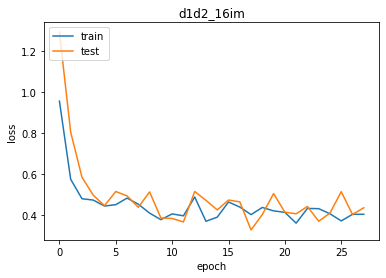

Lossy conversion from float64 to uint8. Range [3426.4427729012655, 23831.70932521236]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [3426.4427729012655, 13713.055235180671]. Convert image to uint8 prior to saving to suppress this warning.


(144, 128, 128, 2)
Input (None, 128, 128, 1)
1. Conv (None, 64, 64, 64)
2. conv (None, 64, 64, 128)
3. conv (None, 32, 32, 256)
4. conv (None, 16, 16, 512)
1. UpConv (None, 32, 32, 768)
2. UpConv (None, 64, 64, 384)
3. UpConv (None, 128, 128, 192)
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
conv2d_30 (Conv2D)              (None, 128, 128, 64) 640         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_28 (BatchNo (None, 128, 128, 64) 256         conv2d_30[0][0]                  
__________________________________________

Epoch 1/50
10/10 [==============================] - 153s 15s/step - loss: 1.1887 - mse: 1.1887 - mae: 0.7473 - val_loss: 1.0249 - val_mse: 1.0249 - val_mae: 0.5981

Epoch 00001: val_loss improved from inf to 1.02486, saving model to d1d2_32im
INFO:tensorflow:Assets written to: d1d2_32im\assets
Epoch 2/50
10/10 [==============================] - 152s 15s/step - loss: 0.6693 - mse: 0.6693 - mae: 0.5657 - val_loss: 0.6720 - val_mse: 0.6720 - val_mae: 0.5041

Epoch 00002: val_loss improved from 1.02486 to 0.67198, saving model to d1d2_32im
INFO:tensorflow:Assets written to: d1d2_32im\assets
Epoch 3/50
10/10 [==============================] - 148s 15s/step - loss: 0.5277 - mse: 0.5277 - mae: 0.5124 - val_loss: 0.5431 - val_mse: 0.5431 - val_mae: 0.4798

Epoch 00003: val_loss improved from 0.67198 to 0.54313, saving model to d1d2_32im
INFO:tensorflow:Assets written to: d1d2_32im\assets
Epoch 4/50
10/10 [==============================] - 149s 15s/step - loss: 0.6027 - mse: 0.6027 - mae: 0.514

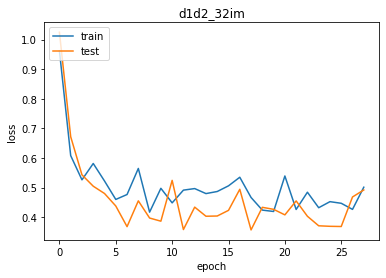

Lossy conversion from float64 to uint8. Range [3426.4427729012655, 30671.70656674776]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [3426.4427729012655, 21785.140763366235]. Convert image to uint8 prior to saving to suppress this warning.


(144, 128, 128, 2)
Input (None, 128, 128, 1)
1. Conv (None, 64, 64, 64)
2. conv (None, 64, 64, 128)
3. conv (None, 32, 32, 256)
4. conv (None, 16, 16, 512)
1. UpConv (None, 32, 32, 768)
2. UpConv (None, 64, 64, 384)
3. UpConv (None, 128, 128, 192)
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
conv2d_45 (Conv2D)              (None, 128, 128, 64) 640         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_42 (BatchNo (None, 128, 128, 64) 256         conv2d_45[0][0]                  
__________________________________________

10/10 [==============================] - 158s 16s/step - loss: 1.1708 - mse: 1.1708 - mae: 0.7423 - val_loss: 0.8927 - val_mse: 0.8927 - val_mae: 0.5557

Epoch 00001: val_loss improved from inf to 0.89269, saving model to d1d2_56im
INFO:tensorflow:Assets written to: d1d2_56im\assets
Epoch 2/50
10/10 [==============================] - 154s 16s/step - loss: 0.5796 - mse: 0.5796 - mae: 0.5398 - val_loss: 0.7023 - val_mse: 0.7023 - val_mae: 0.5600

Epoch 00002: val_loss improved from 0.89269 to 0.70225, saving model to d1d2_56im
INFO:tensorflow:Assets written to: d1d2_56im\assets
Epoch 3/50
10/10 [==============================] - 155s 16s/step - loss: 0.5040 - mse: 0.5040 - mae: 0.5006 - val_loss: 0.5621 - val_mse: 0.5621 - val_mae: 0.5617

Epoch 00003: val_loss improved from 0.70225 to 0.56206, saving model to d1d2_56im
INFO:tensorflow:Assets written to: d1d2_56im\assets
Epoch 4/50
10/10 [==============================] - 153s 16s/step - loss: 0.4280 - mse: 0.4280 - mae: 0.4609 - val_los

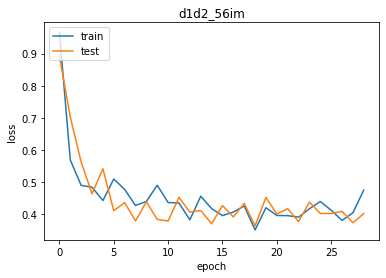

Lossy conversion from float64 to uint8. Range [3426.4427729012655, 27038.059875374725]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [3426.4427729012655, 14402.198514252215]. Convert image to uint8 prior to saving to suppress this warning.


(144, 128, 128, 2)


In [9]:
loss_list = []
for name in names:
    if name == 'd1d2_8im':
        X_train = x_1
        Y_train = y_1
    elif name == 'd1d2_16im':
        X_train = x_2
        Y_train = y_2
    elif name == 'd1d2_32im':
        X_train = x_3
        Y_train = y_3
    elif name == 'd1d2_56im':
        X_train = x_4
        Y_train = y_4
    history = training.train(X_train, Y_train, x_val, y_val, name)
    loss_list.append(history.history['loss'])
    loss_list.append(history.history['val_loss'])
    dir = os.path.join(r'C:\Users\tsche\Desktop\Master\2. Semester\Project Staining\gitrepo\TeresaScheidt\training_results', name +'_loss.png')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(name)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig(dir)
    plt.show()
    model = keras.models.load_model(name)
    image = x_val[0]
    output = pred.predict(model, image, 128, 128, num_outputs=2)
    output_norm = pre.unnormalize(output, mean, std)
    im = output_norm[:,:,0]
    dir_d1 = os.path.join(r'C:\Users\tsche\Desktop\Master\2. Semester\Project Staining\gitrepo\TeresaScheidt\training_results', name + '_d1.png')
    dir_d2 = os.path.join(r'C:\Users\tsche\Desktop\Master\2. Semester\Project Staining\gitrepo\TeresaScheidt\training_results', name +'_d2.png')
    skimage.io.imsave(dir_d1, im)
    im = output_norm[:,:,1]
    skimage.io.imsave(dir_d2, im)